<a href="https://colab.research.google.com/github/hadi-yazdi/hadi-yazdi.github.io/blob/master/(example)K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An example of K-means method in data clustring.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

C:\Users\HADI\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
df = pd.read_csv('C:\\Users\\HADI\\Desktop\\Machine Learning\\Code Quest\\13\\imp_metrics_pf.csv')
df

,id,seat#,transaction#,spend$,end_date
0,15,174,3,31.32,12/29/2015
1,89,27,5,682.49,8/8/2015
2,145,4,2,15.44,10/7/2015
3,228,9,4,242.65,12/31/2015
4,239,7,2,256.82,11/23/2015
...,...,...,...,...,...
285702,1379873,4,1,0.00,1/2/2016
285703,1379881,3,1,12.00,1/2/2016
285704,1379936,9,1,36.00,1/2/2016
285705,1379962,4,1,16.00,1/2/2016


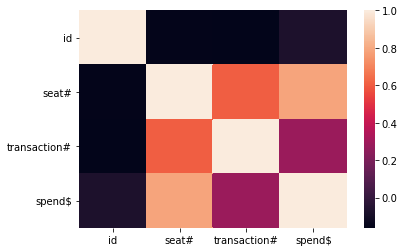

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(df.corr())
plt.show()

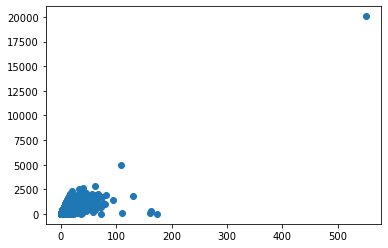

In [ ]:
plt.scatter(df['seat#'], df['spend$'])
plt.show()

In [ ]:
df.shape

(285707, 5)

In [ ]:
df1 = df[['seat#','transaction#','spend$']]
df1['seat#']= preprocessing.scale(df1['seat#'].astype('float64'))
df1['transaction#']= preprocessing.scale(df1['transaction#'].astype('float64'))
df1['spend$']= preprocessing.scale(df1['spend$'].astype('float64'))
df1

C:\Users\HADI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HADI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HADI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,seat#,transaction#,spend$
0,41.614820,2.034481,-1.123313
1,5.371540,4.659149,3.409587
2,-0.299177,0.722147,-1.233856
3,0.933588,3.346815,0.347789
4,0.440482,0.722147,0.446429
...,...,...,...
285702,-0.299177,-0.590187,-1.341337
285703,-0.545730,-0.590187,-1.257803
285704,0.933588,-0.590187,-1.090735
285705,-0.299177,-0.590187,-1.229958


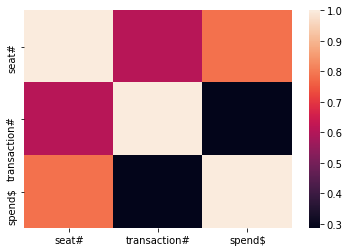

In [ ]:
sb.heatmap(df1.corr())
plt.show()

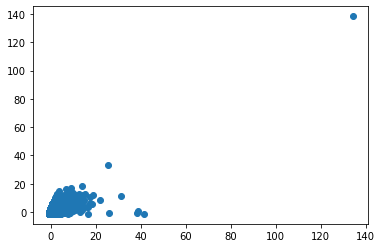

In [ ]:
plt.scatter(df1['seat#'], df1['spend$'])
plt.show()

In [ ]:
train = df1
train.shape

(285707, 3)

In [ ]:
from scipy.spatial.distance import cdist
clusters = range(1,20)
mean_dist=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(train)
    clusassign = model.predict(train)
    #print(clusassign)
    mean_dist.append(sum(np.min(cdist(train,model.cluster_centers_,'euclidean'),axis=1))/train.shape[0])
mean_dist

[1.3053283932394841,
 1.0161792092732185,
 0.7847290196516882,
 0.6993581588198106,
 0.6509459132469129,
 0.5609724491927658,
 0.550441444037415,
 0.5130027239248687,
 0.485550960303584,
 0.4456137728695843,
 0.43629083185106127,
 0.41035391024443346,
 0.41090332585329115,
 0.3902762955531721,
 0.38250834270545686,
 0.3756157991659264,
 0.35920439970331625,
 0.34980162436418205,
 0.3393973815180979]

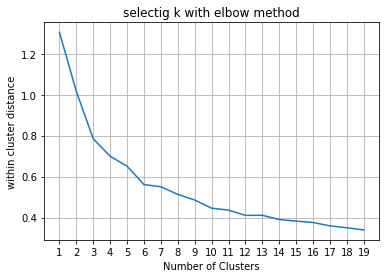

In [ ]:
plt.plot(clusters,mean_dist)
plt.xlabel('Number of Clusters')
plt.ylabel('within cluster distance')
plt.title('selectig k with elbow method')
plt.xticks(clusters)
plt.grid()
plt.show()

In [ ]:
model = KMeans(n_clusters=5)
model.fit(train)
clusassign = model.predict(train)
clusassign

array([2, 2, 3, ..., 0, 0, 3])

In [ ]:
list(model.labels_)

[2,
 2,
 3,
 1,
 3,
 4,
 3,
 1,
 3,
 1,
 3,
 0,
 0,
 3,
 1,
 0,
 2,
 1,
 2,
 1,
 3,
 0,
 1,
 1,
 3,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 3,
 0,
 2,
 3,
 0,
 3,
 1,
 1,
 3,
 2,
 0,
 0,
 3,
 4,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 3,
 2,
 0,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 0,
 3,
 0,
 3,
 4,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 1,
 0,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 1,
 0,
 3,
 3,
 1,
 3,
 0,
 0,
 1,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 1,
 3,
 4,
 3,
 3,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 1,
 0,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 0,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 1,
 3,
 0,
 3,
 4,
 0,
 3,
 3,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 3,
 3,
 3,
 4,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 0,
 0,
 0,
 3,
 1,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 1,
 3,
 3,
 1,
 1,
 0,
 4,
 1,
 3,
 0,
 0,
 3,
 1,
 3,


In [ ]:
df1['cluster'] = list(model.labels_)
df['cluster'] = list(model.labels_)
df

C:\Users\HADI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,seat#,transaction#,spend$,end_date,cluster
0,15,174,3,31.32,12/29/2015,2
1,89,27,5,682.49,8/8/2015,2
2,145,4,2,15.44,10/7/2015,3
3,228,9,4,242.65,12/31/2015,1
4,239,7,2,256.82,11/23/2015,3
...,...,...,...,...,...,...
285702,1379873,4,1,0.00,1/2/2016,0
285703,1379881,3,1,12.00,1/2/2016,0
285704,1379936,9,1,36.00,1/2/2016,0
285705,1379962,4,1,16.00,1/2/2016,0


In [ ]:
df['cluster'].value_counts()

0    156886
3     72472
4     40689
1      9408
2      6252
Name: cluster, dtype: int64

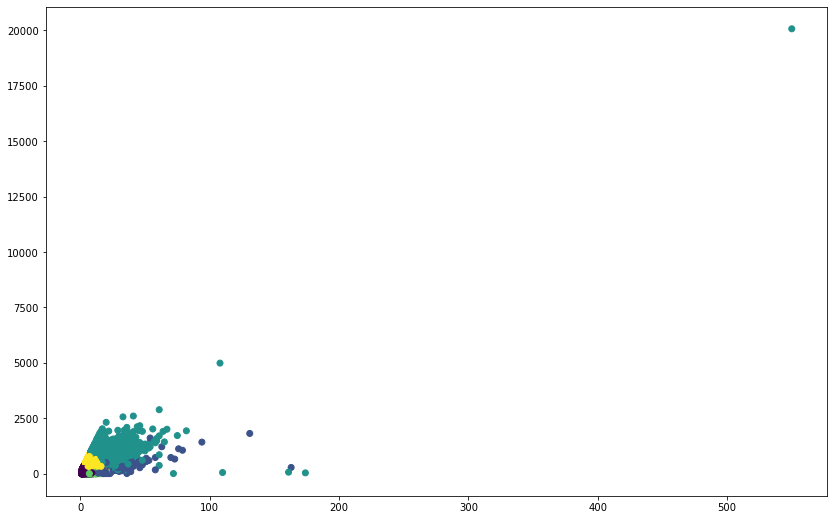

In [ ]:
plt.figure(figsize=[14,9])
plt.scatter(df['seat#'], df['spend$'], c=df['cluster'])
plt.show()

In [ ]:
more500 = df['seat#']>500
more500[more500 == True].index

Int64Index([200651], dtype='int64')

In [ ]:
df2 = df.drop([200651], axis=0)
df2

,id,seat#,transaction#,spend$,end_date,cluster
0,15,174,3,31.32,12/29/2015,2
1,89,27,5,682.49,8/8/2015,2
2,145,4,2,15.44,10/7/2015,3
3,228,9,4,242.65,12/31/2015,1
4,239,7,2,256.82,11/23/2015,3
...,...,...,...,...,...,...
285702,1379873,4,1,0.00,1/2/2016,0
285703,1379881,3,1,12.00,1/2/2016,0
285704,1379936,9,1,36.00,1/2/2016,0
285705,1379962,4,1,16.00,1/2/2016,0


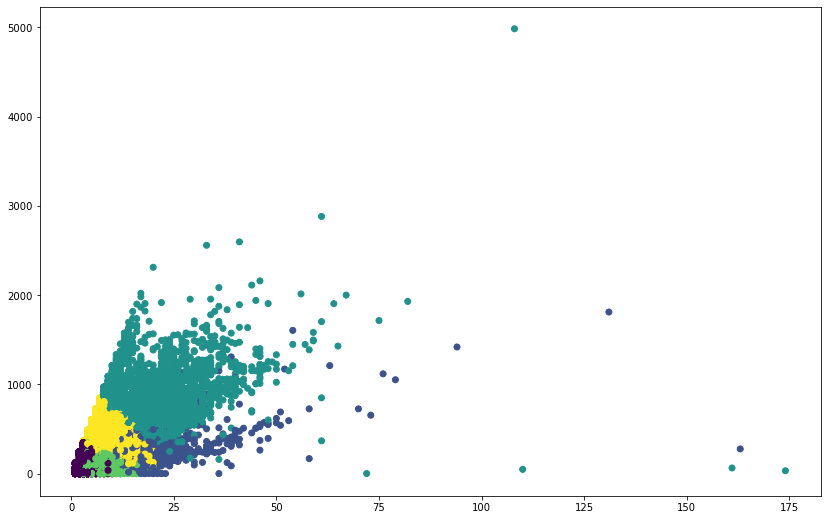

In [ ]:
plt.figure(figsize=[14,9])
plt.scatter(df2['seat#'], df2['spend$'], c=df2['cluster'])
plt.show()

In [ ]:
from sklearn.decomposition import PCA

train.drop(['cluster'], axis=1, inplace=True)
pca2 = PCA(2)
plot_columns = pca2.fit_transform(train)
plot_columns

C:\Users\HADI\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([[27.62364627, -1.28627726],
       [ 7.76553412,  1.26867347],
       [-0.54895645,  1.3332262 ],
       ...,
       [-0.30405145,  0.08883289],
       [-1.19169146,  0.27704974],
       [-0.12595267,  1.33292815]])

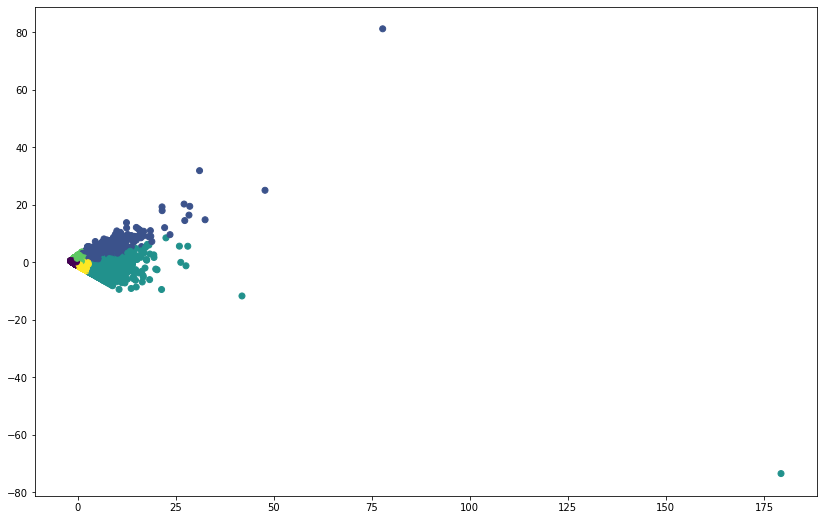

In [ ]:
plt.figure(figsize=[14,9])
plt.scatter(plot_columns[:,0], plot_columns[:,1], c=model.labels_)
plt.show()

In [ ]:
train

,seat#,transaction#,spend$,cluster
0,41.614820,2.034481,-1.123313,2
1,5.371540,4.659149,3.409587,2
2,-0.299177,0.722147,-1.233856,3
3,0.933588,3.346815,0.347789,1
4,0.440482,0.722147,0.446429,3
...,...,...,...,...
285702,-0.299177,-0.590187,-1.341337,0
285703,-0.545730,-0.590187,-1.257803,0
285704,0.933588,-0.590187,-1.090735,0
285705,-0.299177,-0.590187,-1.229958,0
